**SURVEY ANALYSIS**
 
**OMNI-CHANNEL MARKETING STRATEGY**

Dhanika Sujan/
Koushik Subramani Murali/
Shreya Bedi/
Sudheeshna Sampath

# PROJECT - SURVEY ANALYSIS 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

#ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DSPM_clean_vF.csv")
df.drop_duplicates(keep='first',inplace=True)
df.reset_index(inplace=True,drop=True)

In [ ]:
column_list = df.columns
column_list

Index(['Age', 'Gender', 'State', 'Region', 'EmploymentStatus', 'HaveChildren',
       'HouseholdIncome', 'DeviceForMovie', 'DeviceForSports',
       'DeviceForTVShows', 'BingeWatcher', 'TopMediaOwned',
       'MediaPlannedPurchase', 'PreferredMedia', 'MostFrequentAppsUsed',
       'TimeSpentOnDeviceWhileWatching', 'MarketingAffinity'],
      dtype='object')

In [ ]:
df.head()

,Age,Gender,State,Region,EmploymentStatus,HaveChildren,HouseholdIncome,DeviceForMovie,DeviceForSports,DeviceForTVShows,BingeWatcher,TopMediaOwned,MediaPlannedPurchase,PreferredMedia,MostFrequentAppsUsed,TimeSpentOnDeviceWhileWatching,MarketingAffinity
0,28,Female,California,West,Unemployed,0,Medium,Portable,Computer,Computer,0,Portable,TV,Portable,Lifestyle,0.82,Unfavorable-Cannot disclose information for ta...
1,33,Female,New York,Northeast,Unemployed,1,Medium,TV,TV,TV,0,TV,TV,TV,Productivity,0.83,Disinterested-Willing to pay to avoid ads
2,24,Male,Nevada,West,Employed,0,Medium,TV,TV,TV,1,TV,Portable,TV,Entertainment,0.86,Neutral-Open to ads if given subscription disc...
3,51,Female,New Jersey,Northeast,Employed,0,Medium,TV,TV,TV,0,TV,TV,TV,Essential,-,Unfavorable-Cannot disclose information for ta...
4,20,Male,Arkansas,South,Unemployed,0,Low,Computer,Computer,Computer,0,TV,TV,TV,Productivity,1.00,Unfavorable-Cannot disclose information for ta...


### **Data Analysis**

In [ ]:
#Data Analysis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2076 entries, 0 to 2075
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2076 non-null   int64 
 1   Gender                          2076 non-null   object
 2   State                           2076 non-null   object
 3   Region                          2076 non-null   object
 4   EmploymentStatus                2076 non-null   object
 5   HaveChildren                    2076 non-null   int64 
 6   HouseholdIncome                 2076 non-null   object
 7   DeviceForMovie                  2076 non-null   object
 8   DeviceForSports                 2076 non-null   object
 9   DeviceForTVShows                2076 non-null   object
 10  BingeWatcher                    2076 non-null   int64 
 11  TopMediaOwned                   2076 non-null   object
 12  MediaPlannedPurchase            2076 non-null   

**Age and Gender Distribution**

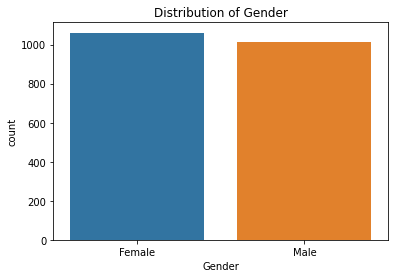

In [ ]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Distribution of Gender across the data
sns.countplot(x='Gender', data=df);
plt.title('Distribution of Gender');

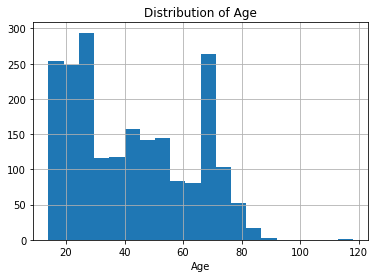

In [ ]:
# Age Distribution

# Creating a histogram of ages
df.hist('Age', bins=20);
plt.title('Distribution of Age');
plt.xlabel('Age');

Looking at the histogram, we can see that Age is mostly distributed between early 20s to mid 30s. Also, we have a spike around late 60s


In [ ]:
# Count of rows where the age is greater than 100. These are probably the outliers that we need to remove

(df['Age'] > 100).value_counts()

False    2075
True        1
Name: Age, dtype: int64

In [ ]:
df[df['Age']>100]

,Age,Gender,State,Region,EmploymentStatus,HaveChildren,HouseholdIncome,DeviceForMovie,DeviceForSports,DeviceForTVShows,BingeWatcher,TopMediaOwned,MediaPlannedPurchase,PreferredMedia,MostFrequentAppsUsed,TimeSpentOnDeviceWhileWatching,MarketingAffinity
1516,118,Male,Kentucky,South,Unemployed,1,Do not know,TV,TV,TV,1,TV,TV,GamingConsole,Entertainment,1.00,Disinterested-Willing to pay to avoid ads


 Distplot for Age Distribution using kernel density estimate (KDE).

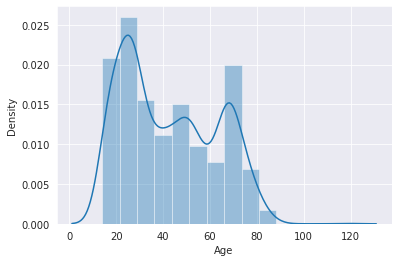

In [ ]:
sns.set_style('darkgrid')
sns.distplot(df.Age, bins= 14)

#### **Region Division**

Unique Count:
 South        748
West         508
Midwest      440
Northeast    380
Name: Region, dtype: int64


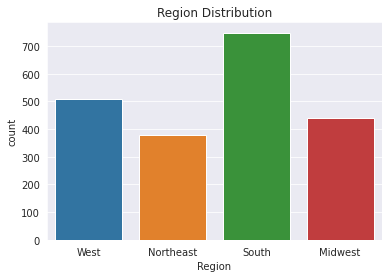

In [ ]:
#Region division across the data
sns.countplot(x='Region', data=df);
plt.title('Region Distribution');

print("Unique Count:\n", df['Region'].value_counts())

#### **Employment Status**

Unique Count:
 Employed      1005
Retired        455
Student        322
Unemployed     294
Name: EmploymentStatus, dtype: int64


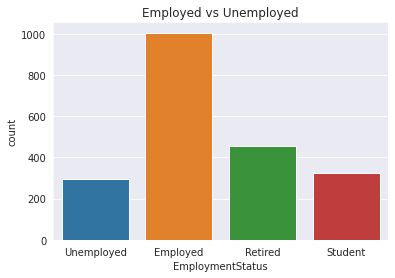

In [ ]:
sns.countplot(x='EmploymentStatus', data=df);
plt.title('Employed vs Unemployed');

print("Unique Count:\n", df['EmploymentStatus'].value_counts())

#### **Income distribution across household**

##### Can use this to come up with some analysis for future recommendations. As mostly people have medium to low income

Unique Count:
 Low            958
Medium         915
Do not know    176
High            27
Name: HouseholdIncome, dtype: int64


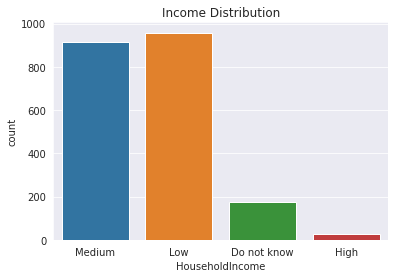

In [ ]:
sns.countplot(x='HouseholdIncome', data=df);
plt.title('Income Distribution');

print("Unique Count:\n", df['HouseholdIncome'].value_counts())

#### **Type of Applications Used**

Unique Count:
 Entertainment    760
Productivity     755
Essential        516
Lifestyle         45
Name: MostFrequentAppsUsed, dtype: int64


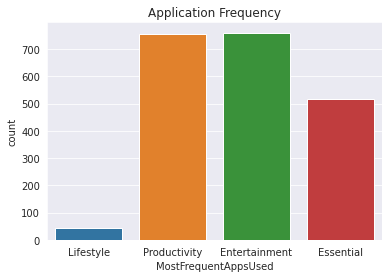

In [ ]:


sns.countplot(x='MostFrequentAppsUsed', data=df);
plt.title('Application Frequency');

print("Unique Count:\n", df['MostFrequentAppsUsed'].value_counts())

#### **Time Spent On Device While Watching**

In [ ]:
type(df['TimeSpentOnDeviceWhileWatching'])

pandas.core.series.Series

In [ ]:
df["TimeSpentOnDeviceWhileWatching"].replace({' -   ': 0.00}, inplace=True)

In [ ]:
df['TimeSpentOnDeviceWhileWatching'] = df['TimeSpentOnDeviceWhileWatching']. astype(float)

<Figure size 792x360 with 0 Axes>

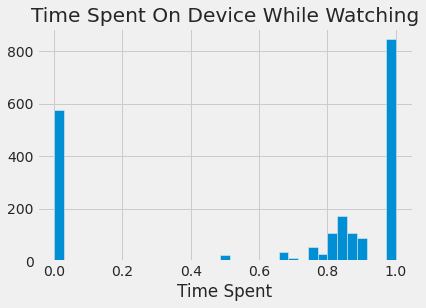

In [ ]:
# Histogram distribution for Time Spent
plt.figure(figsize = (11,5))
df.hist('TimeSpentOnDeviceWhileWatching', bins=35);
plt.title('Time Spent On Device While Watching');
plt.xlabel('Time Spent');

0.00 means that we do not have the data for this

#### **Distribution of Individuals Having Children**

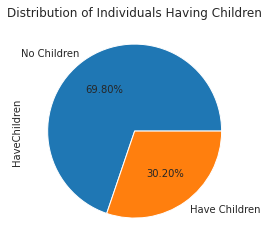

In [ ]:
df['HaveChildren'].value_counts().plot(kind='pie',autopct='%.2f%%',labels =['No Children','Have Children'], title = 'Distribution of Individuals Having Children')

### **Distribution of Devices For Movies**

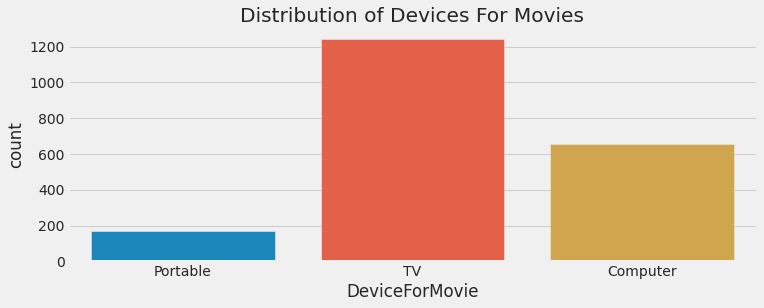

In [ ]:
plt.figure(figsize = (11,4))
sns.countplot(x='DeviceForMovie', data=df)
plt.title('Distribution of Devices For Movies');

### **Distibution of Devices For Sports**

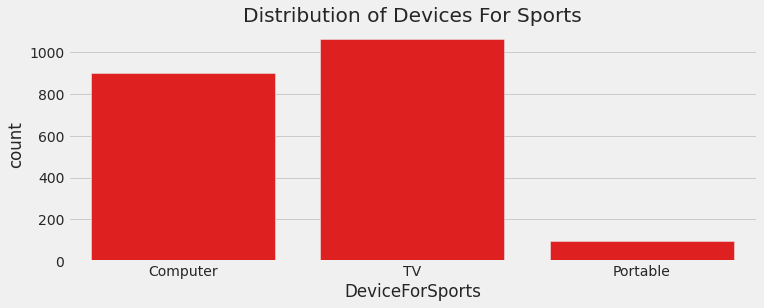

In [ ]:
plt.figure(figsize = (11,4))
sns.countplot(x='DeviceForSports', data=df, color='red')
plt.title('Distribution of Devices For Sports');

### **Distibution of Devices For TV Shows**

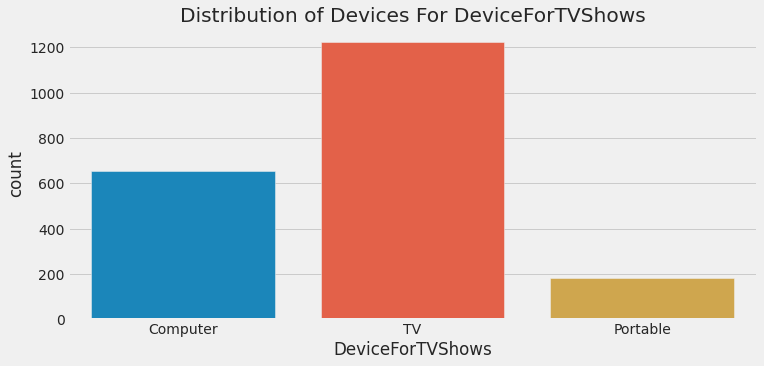

In [ ]:
plt.figure(figsize = (11,5))
sns.countplot(x='DeviceForTVShows', data=df)
plt.title('Distribution of Devices For DeviceForTVShows');

### **Binge Watcher by Age**

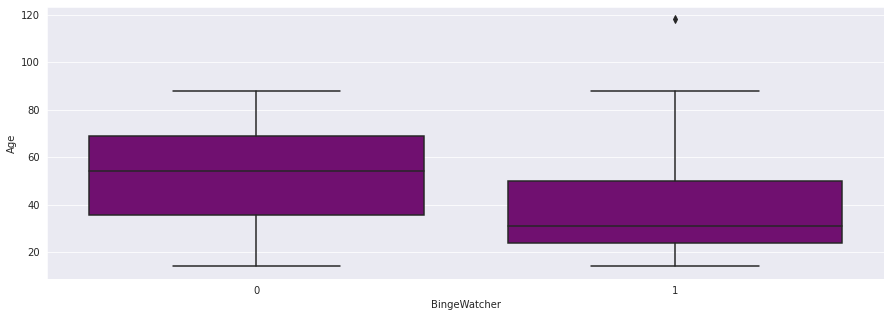

In [ ]:
plt.figure(figsize = (15,5))
sns.boxplot(data= df, x= 'BingeWatcher', y = 'Age',color='purple');

We can see that the the binge watchers are the 20-30 year old's

### **Binge Watchers by Planned Media Purchase**

Text(0.5, 1.0, 'Binge Watch status MediaPlannedPurchase wise')

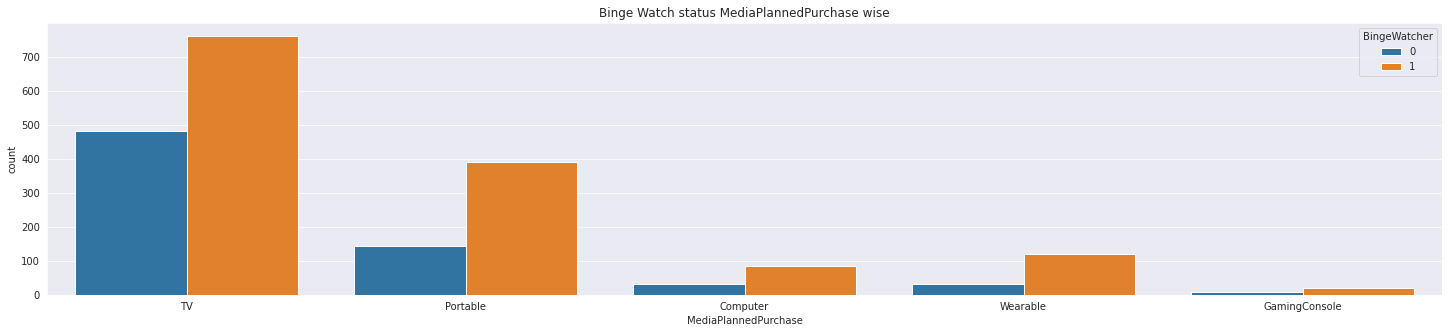

In [ ]:
plt.figure(figsize = (25,5))
sns.countplot(data=df,x='MediaPlannedPurchase',hue='BingeWatcher').set_title('Binge Watch status MediaPlannedPurchase wise')


Majority of the binge watchers have TV and portable devices as their planned media purchase

### **Binge Watchers by Gender**

Text(0.5, 1.0, 'Binge Watchers by Gender')

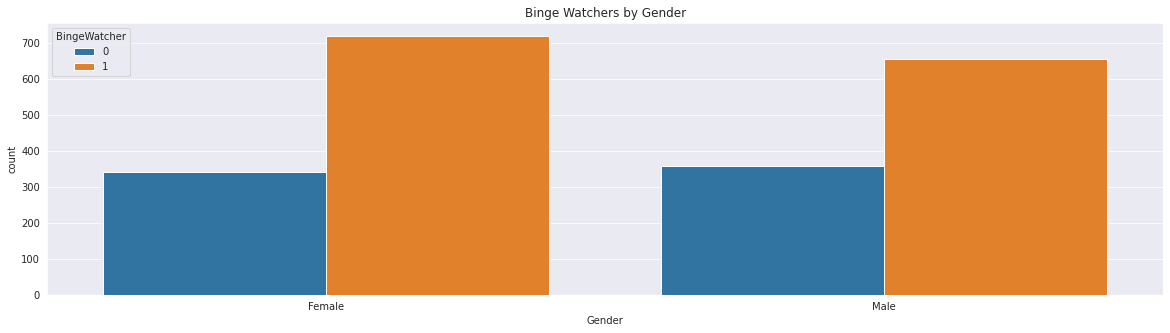

In [ ]:
plt.figure(figsize = (20,5))
sns.countplot(data=df,x='Gender',hue='BingeWatcher').set_title('Binge Watchers by Gender')


### **Distribution of Top Media Owned by Gender**

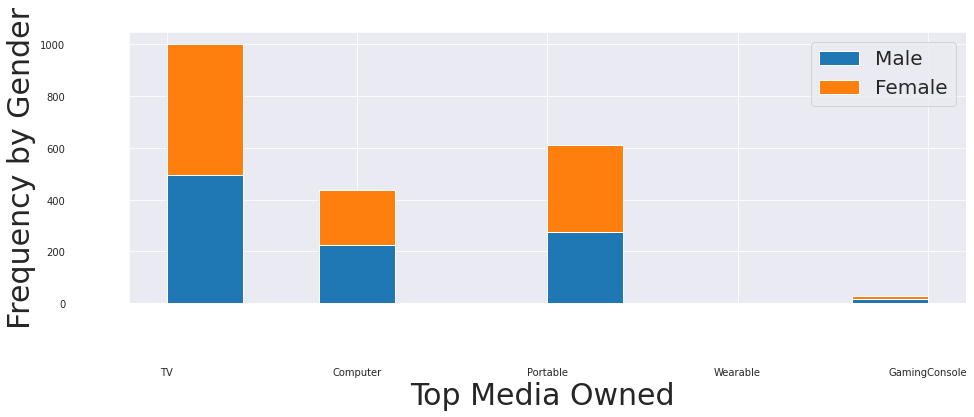

In [ ]:
plt.figure(figsize=(15,5))
plt.xlabel('Top Media Owned ', fontsize=30)
plt.ylabel('Frequency by Gender', fontsize=30)
plt.tick_params(size=60)
plt.hist([df[df.Gender == 'Male'].TopMediaOwned , df[df.Gender == 'Female'].TopMediaOwned
         ],label=['Male','Female'],
         stacked='True')
plt.legend(fontsize=20)
plt.show()

### **Distribution of Top Media Owned by Age**

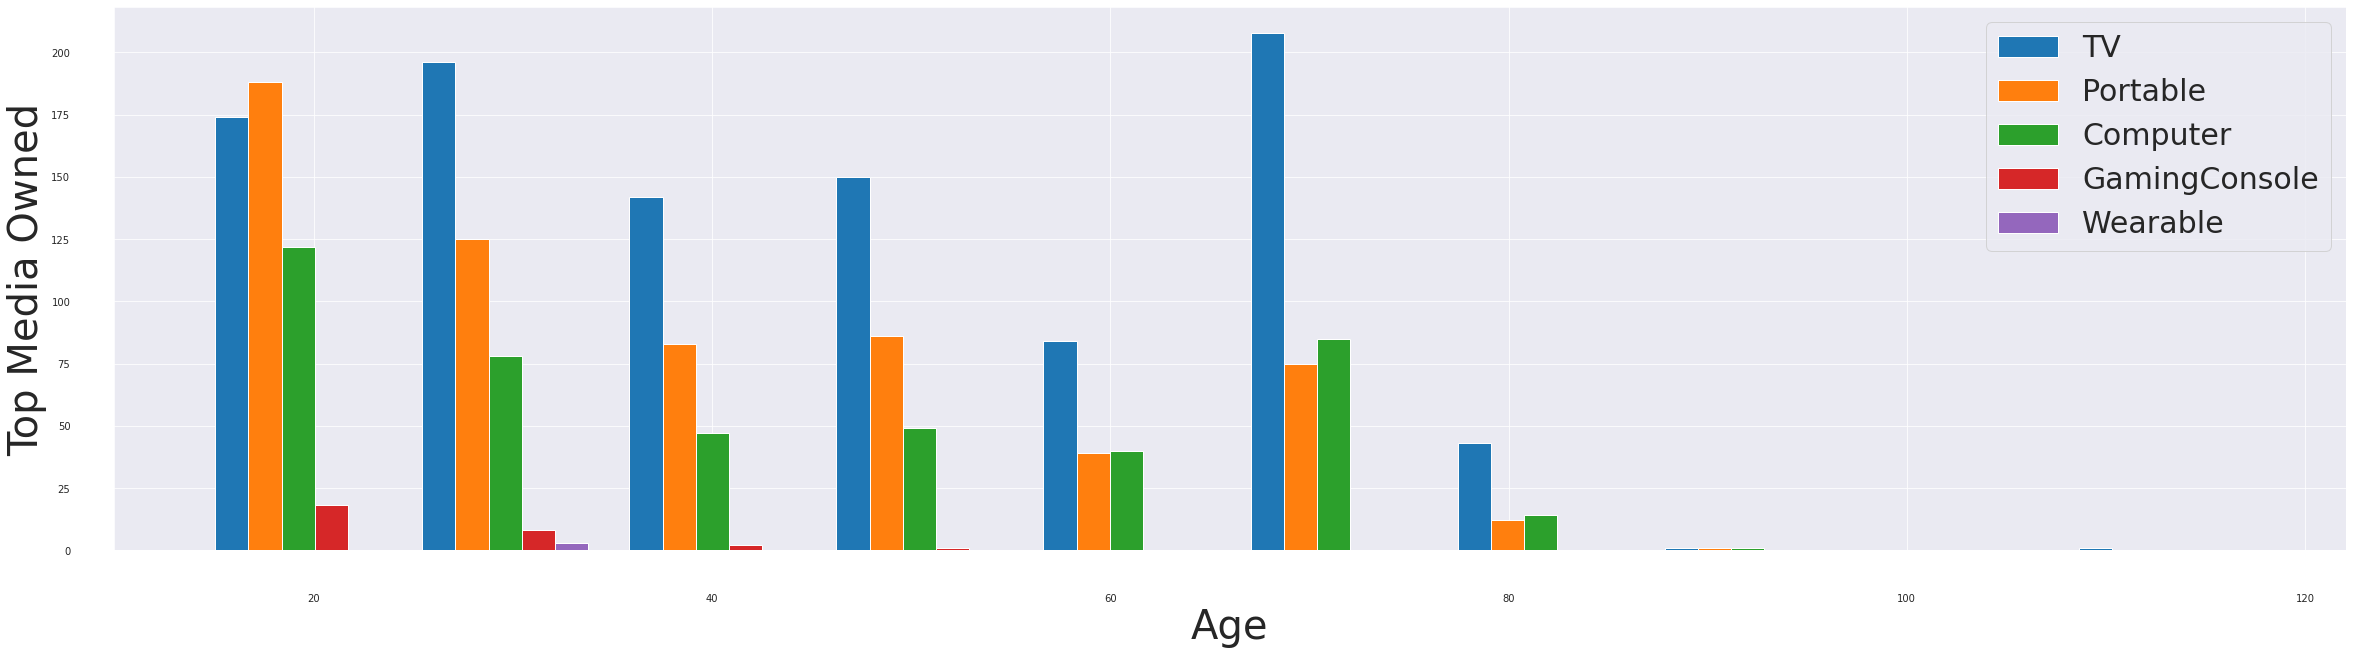

In [ ]:
plt.figure(figsize=(40,10))
plt.xlabel('Age', fontsize=40)
plt.ylabel('Top Media Owned', fontsize=40)
plt.tick_params(size=40)

plt.hist([df[df.TopMediaOwned == 'TV'].Age, df[df.TopMediaOwned == 'Portable'].Age , 
          df[df.TopMediaOwned == 'Computer'].Age,  df[df.TopMediaOwned == 'GamingConsole'].Age,
           df[df.TopMediaOwned == 'Wearable'].Age 
         ],label=['TV', 'Portable','Computer', 'GamingConsole','Wearable']
        )
plt.legend(fontsize=30)
plt.show()

We can see that the age group of 60s-80s primarily own a TV to consume their media. TV is the main media device owned across all age groups
except people in 20s use Portable Media Devices more

### **Distribution of Most Frequent Apps by Gender**

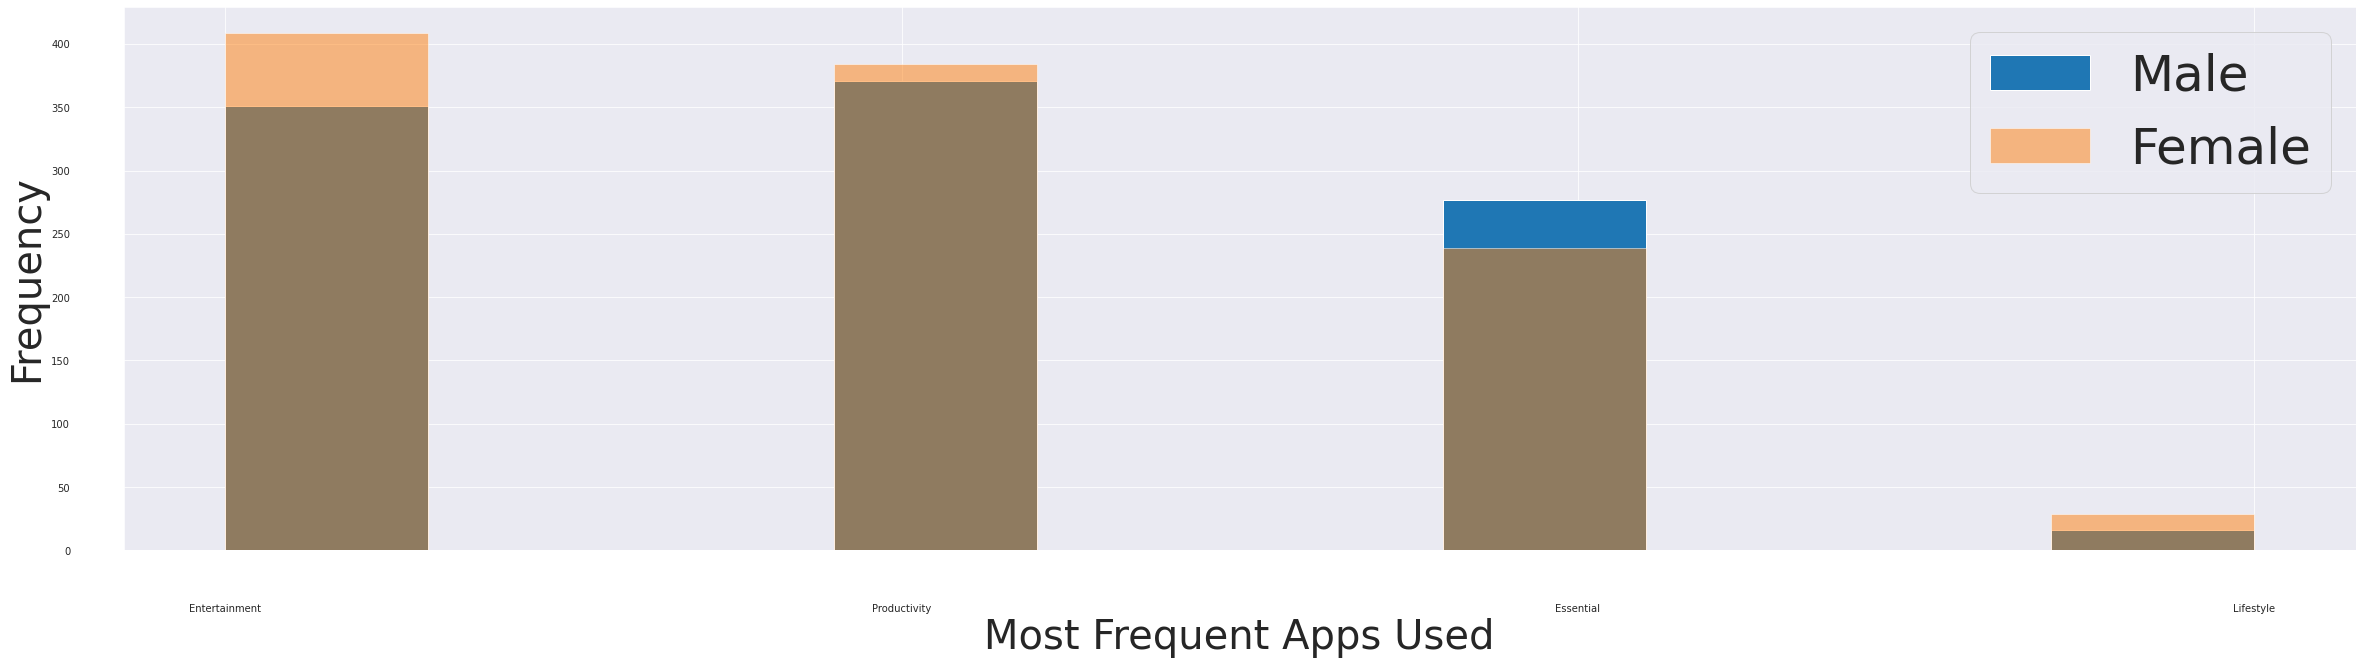

In [ ]:
plt.figure(figsize=(40,10))
plt.xlabel('Most Frequent Apps Used', fontsize=40)
plt.ylabel('Frequency', fontsize=40)
plt.tick_params(size=50)

plt.hist([df[df.Gender == 'Male'].MostFrequentAppsUsed
         ], label ='Male', alpha = 1
        )
plt.hist([df[df.Gender == 'Female'].MostFrequentAppsUsed
         ], label ='Female', alpha=0.5
        )
plt.legend(fontsize=50)
plt.show()

Females use apps more in all categories except Essential Apps which are primarily used by males 

### **Distribution of Preferred media by parentage**

In [ ]:
df.PreferredMedia.value_counts()

Portable         622
TV               622
Computer         598
GamingConsole    201
Wearable          20
Name: PreferredMedia, dtype: int64

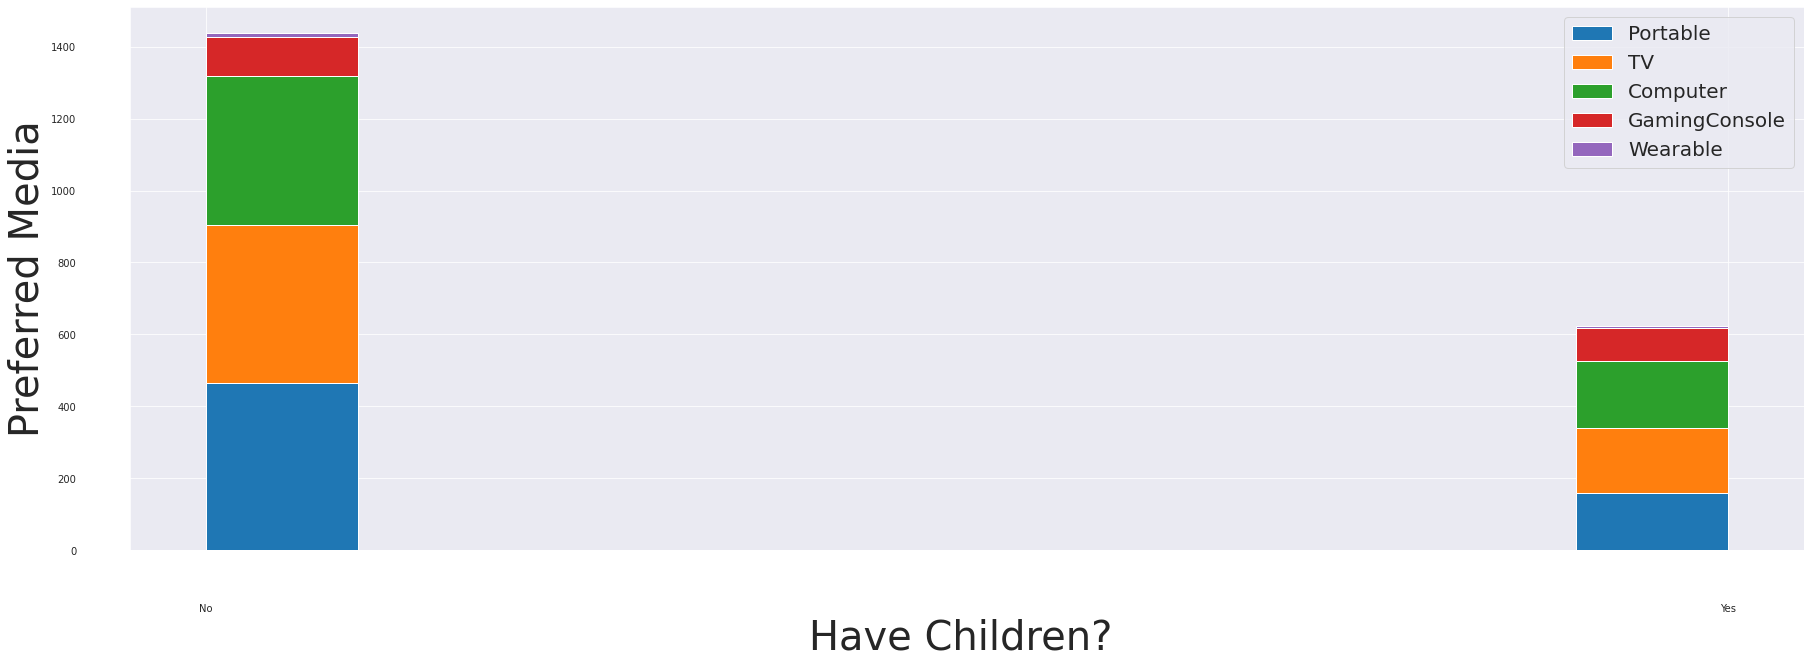

In [ ]:
plt.figure(figsize=(30,10))
plt.xlabel('Have Children? ', fontsize=40)
plt.ylabel('Preferred Media', fontsize=40)
plt.tick_params(size=50)
plt.xticks(ticks = [0,1],labels=['No','Yes'])
plt.hist([df[df.PreferredMedia == 'Portable'].HaveChildren , df[df.PreferredMedia == 'TV'].HaveChildren,
          df[df.PreferredMedia == 'Computer'].HaveChildren , df[df.PreferredMedia == 'GamingConsole'].HaveChildren,
          df[df.PreferredMedia == 'Wearable'].HaveChildren
         ],label=['Portable','TV', 'Computer', 'GamingConsole','Wearable'],
         stacked='True')
plt.legend(fontsize=20)
plt.show()

CLUSTERING

In [ ]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [ ]:
#replace df1 with clean dataframe after EDA
df = df.dropna(how='any',axis=0) 
df1=df

In [ ]:
#Standardizing our dataset
PreLE = preprocessing.LabelEncoder()
df1 = df1.apply(PreLE.fit_transform)

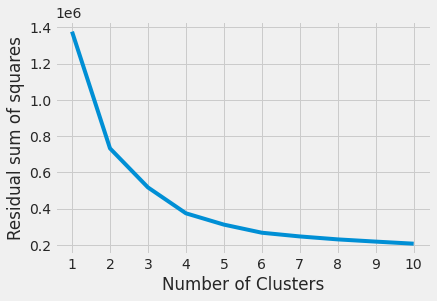

In [ ]:
#Finding number of clusters

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k,  random_state=0)
    kmeans.fit_predict(df1)
    sse.append(kmeans.inertia_)

#Finding elbow point to find the most appropriate number of clusters
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
# plt.title("Finding Optimal no.of clusters for K-Means: ")
plt.xlabel("Number of Clusters")
plt.ylabel("Residual sum of squares")
plt.show()

In [ ]:
#Finding cluster using Kmeans
kmean = KMeans(n_clusters=4, init = "random", n_init = 5)
labels = kmean.fit_predict(df1)

In [ ]:
#Number of records in each cluster
for i in range(4):
    print("Cluster Predicted - ",i,": ",len(labels[labels==i]))

Cluster Predicted -  0 :  646
Cluster Predicted -  1 :  483
Cluster Predicted -  2 :  515
Cluster Predicted -  3 :  419


In [ ]:
df_cluster = df
df_cluster['Cluster_Predicted'] = labels
df_cluster.head()

,Age,Gender,State,Region,EmploymentStatus,HaveChildren,HouseholdIncome,DeviceForMovie,DeviceForSports,DeviceForTVShows,BingeWatcher,TopMediaOwned,MediaPlannedPurchase,PreferredMedia,MostFrequentAppsUsed,TimeSpentOnDeviceWhileWatching,MarketingAffinity,Cluster_Predicted
0,28,Female,California,West,Unemployed,0,Medium,Portable,Computer,Computer,0,Portable,TV,Portable,Lifestyle,0.82,Unfavorable-Cannot disclose information for ta...,0
1,33,Female,New York,Northeast,Unemployed,1,Medium,TV,TV,TV,0,TV,TV,TV,Productivity,0.83,Disinterested-Willing to pay to avoid ads,2
2,24,Male,Nevada,West,Employed,0,Medium,TV,TV,TV,1,TV,Portable,TV,Entertainment,0.86,Neutral-Open to ads if given subscription disc...,2
3,51,Female,New Jersey,Northeast,Employed,0,Medium,TV,TV,TV,0,TV,TV,TV,Essential,0.00,Unfavorable-Cannot disclose information for ta...,3
4,20,Male,Arkansas,South,Unemployed,0,Low,Computer,Computer,Computer,0,TV,TV,TV,Productivity,1.00,Unfavorable-Cannot disclose information for ta...,0


CLASSIFICATION & FEATURE SELECTION

In [ ]:
#Bucketed Age group and other values in excel and reading the cleaned csv
df_new = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DSPM_clean_vF_k.csv")

In [ ]:
#Data Pre-processing
df_new = df_new.drop_duplicates(keep='first')

feature_columns = ['AgeGroup', 'Gender','EmploymentStatus', 'HaveChildren',
       'HouseholdIncome', 'DeviceForMovie', 'DeviceForSports',
       'DeviceForTVShows', 'BingeWatcher', 'TopMediaOwned',
       'MediaPlannedPurchase', 'PreferredMedia', 'MostFrequentAppsUsed',
       'TimeSpentOnDeviceWhileWatchingCategory']
X1 = df_new[feature_columns]
Y1 = df_new.MarketingAffinity

In [ ]:
X_features = pd.get_dummies(X1)

label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(Y1)

In [ ]:
X_features.shape

(1850, 41)

In [ ]:
#Oversampling data
ros = RandomOverSampler(sampling_strategy='all')
X_features, target_encoded = ros.fit_resample(X_features,target_encoded)
X_train, X_test, y_train,y_test = train_test_split(X_features, target_encoded,test_size=0.2, random_state=21)

In [ ]:
target_encoded.shape

(3508,)

In [ ]:
rf = RandomForestClassifier()

random_grid_rf = {'max_features': ['auto', 'sqrt'],'min_samples_split': [2,3,4],
                  'min_samples_leaf':[1,2,3],'max_depth':[4,6,8,10,12],
                  'n_estimators':[50,100,200,250]}

rf_random = GridSearchCV(estimator=rf, param_grid=random_grid_rf, cv= 3)
rf_params = rf_random.fit(X_train, y_train)
print("Hyperparameters Chosen:", rf_params.best_params_)
print()  

# Fitting our train data to predict sentiment on our test data
rf_classifier = RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split= 3, min_samples_leaf=1, n_estimators=200)
rf_classifier.fit(X_train, y_train)

y_test_pred = rf_classifier.predict(X_test)
y_train_pred = rf_classifier.predict(X_train)

#Model Accuracy
print("Random Forest Test Accuracy: " ,  round(accuracy_score(y_test,y_test_pred)*100,2),"%")
print("Random Forest Train Accuracy: " ,  round(accuracy_score(y_train,y_train_pred)*100,2),"%") 

#Overall Model Performance
rf_classifier.fit(X_features, target_encoded)
y_pred = rf_classifier.predict(X_features)
print("Decision tree Model Accuracy: " ,  round(accuracy_score(target_encoded,y_pred)*100,2),"%")
print("Model F1 Score: ", round(f1_score(target_encoded, y_pred, average='weighted')*100,2),"%" )

Hyperparameters Chosen: {'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}

Random Forest Test Accuracy:  69.52 %
Random Forest Train Accuracy:  90.09 %
Decision tree Model Accuracy:  89.85 %
Model F1 Score:  89.77 %


In [ ]:
dct = DecisionTreeClassifier()
dt_param = {'criterion':['gini','entropy'],'max_depth':[4,6,8,10,12]}
dt_random = GridSearchCV(dct, dt_param, cv=3)
dt_parameters = dt_random.fit(X_train, y_train)
print("Hyperparameters Chosen:", dt_parameters.best_params_)
print()  
    
# Fitting our train data to predict sentiment on our test data
dtcModel = DecisionTreeClassifier(criterion= 'entropy',max_depth=12)
dtcModel.fit(X_train, y_train)
y_test_pred = dtcModel.predict(X_test)
y_train_pred = dtcModel.predict(X_train)

#Model Accuracy
print("Decision tree Test Accuracy: " ,  round(accuracy_score(y_test,y_test_pred)*100,2),"%")
print("Decision tree Train Accuracy: " ,  round(accuracy_score(y_train,y_train_pred)*100,2),"%")

#Overall Model Performance
dtcModel.fit(X_features, target_encoded)
y_pred = dtcModel.predict(X_features)
print("Decision tree Model Accuracy: " ,  round(accuracy_score(target_encoded,y_pred)*100,2),"%")
print("Model F1 Score: ", round(f1_score(target_encoded, y_pred, average='weighted')*100,2),"%" )

Hyperparameters Chosen: {'criterion': 'gini', 'max_depth': 12}

Decision tree Test Accuracy:  59.26 %
Decision tree Train Accuracy:  77.98 %
Decision tree Model Accuracy:  78.34 %
Model F1 Score:  77.94 %


Our Random Forrest Classifier performs slightly better than our Decision Tree Classifier so we proceed with extracting the feature importances from the Random Forrest Classifier Model

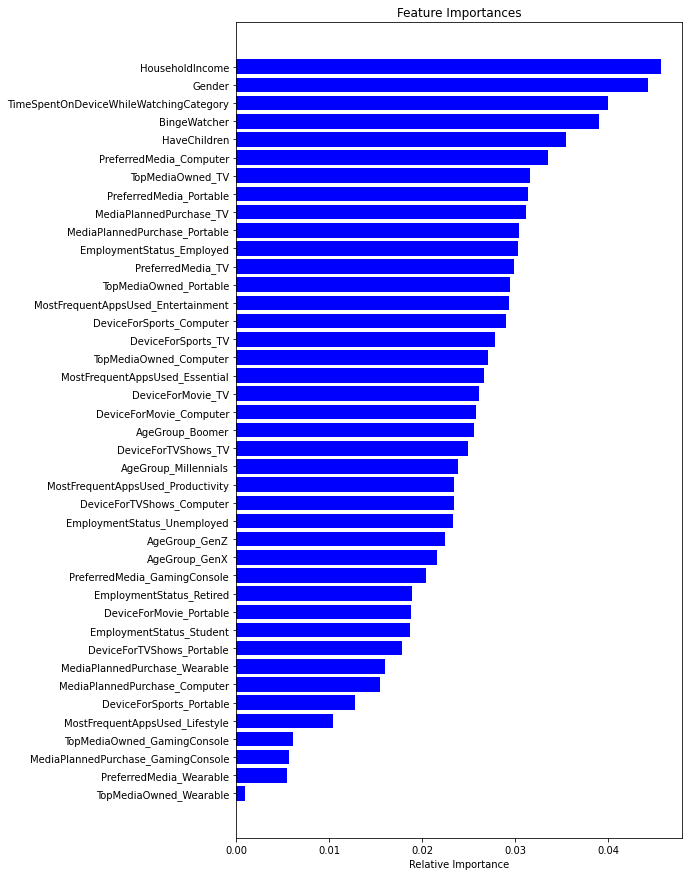

In [ ]:
#Plotting the important feature from Classifier
features = X_features.columns
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,15)) 
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Analyzing Important Features

In [ ]:
# !pip install dython
from dython.nominal import associations

ModuleNotFoundError: ignored

In [ ]:
df=df_new[['AgeGroup', 'Gender','HaveChildren',
       'HouseholdIncome', 'DeviceForMovie', 'DeviceForSports',
       'DeviceForTVShows', 'BingeWatcher', 'TopMediaOwned', 'PreferredMedia', 'MostFrequentAppsUsed',
       'TimeSpentOnDeviceWhileWatchingCategory', 'MarketingAffinity']].copy()

In [ ]:
df['MarketingAffinity'] = df['MarketingAffinity'].replace({'Unfavorable-Cannot disclose information for targeted ads': 'Unfavorable',
                                                           'Disinterested-Willing to pay to avoid ads':'Disinterested',
                                                           'HighInterest-Willing to give more information for personalized ads':'HighInterest',
                                                           'Neutral-Open to ads if given subscription discounts':'Neutral'})

In [ ]:
df_feat = pd.concat([df, pd.get_dummies(df['MarketingAffinity'])], axis=1)
del df_feat['MarketingAffinity']

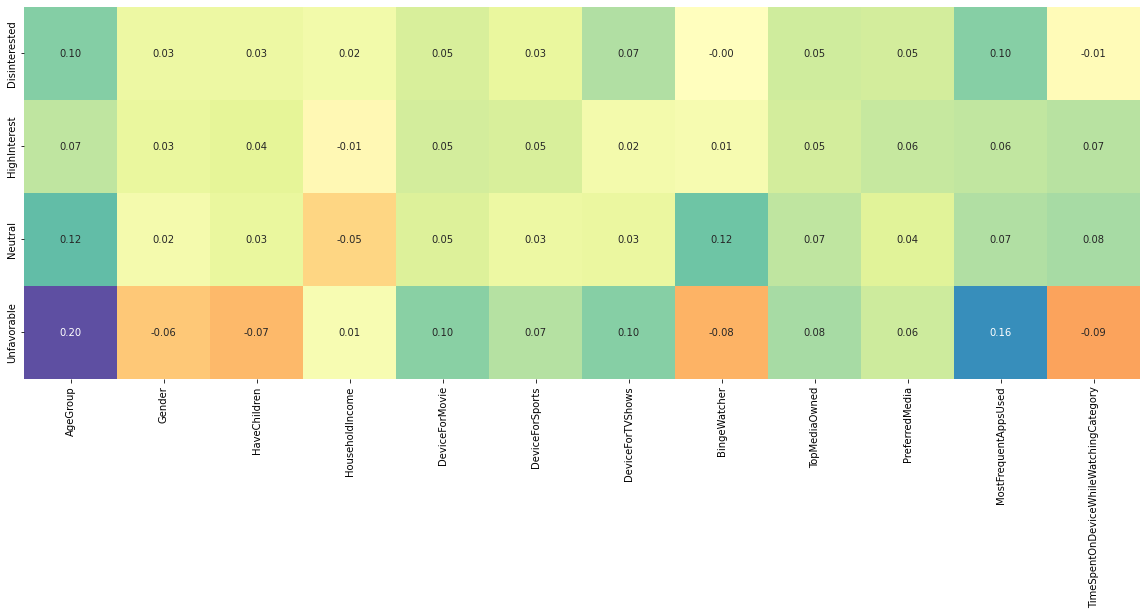

In [ ]:
complete_correlation= associations(df_feat, figsize=(20,10),vmax=0.2, vmin=-0.1,
                                   hide_columns=['Disinterested', 'HighInterest', 'Neutral', 'Unfavorable'], 
                                   hide_rows=['AgeGroup', 'Gender', 'HaveChildren', 'HouseholdIncome','DeviceForMovie', 'DeviceForSports', 'DeviceForTVShows', 'BingeWatcher',
                                                'TopMediaOwned', 'PreferredMedia', 'MostFrequentAppsUsed','TimeSpentOnDeviceWhileWatchingCategory'],
                                   cmap='Spectral',cbar=False)

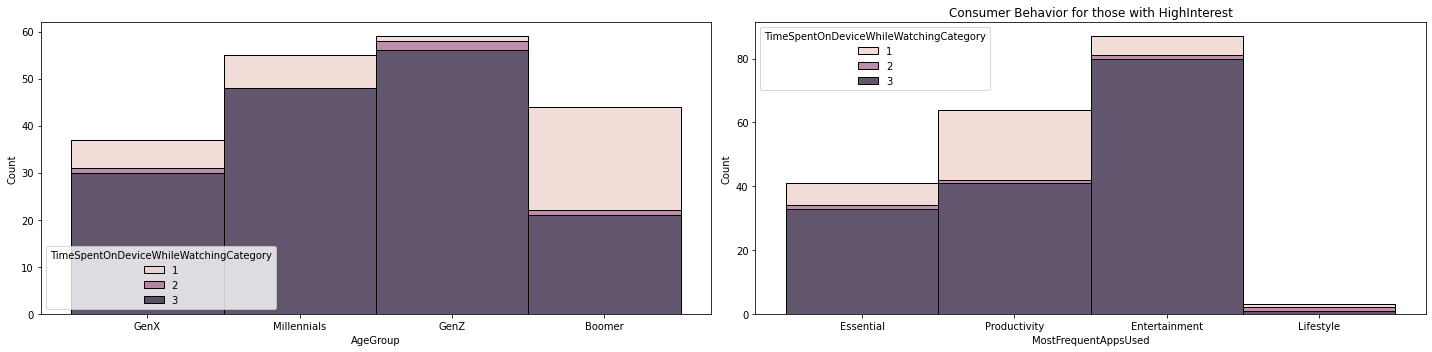

In [ ]:
#Analyzing features with high correlation for 'High Interested' (would give more information for targetted ads) consumers
f, axs = plt.subplots(1,2,figsize = (20,5))
sns.histplot(x="AgeGroup", hue="TimeSpentOnDeviceWhileWatchingCategory", data=df[df['MarketingAffinity']=='HighInterest'], stat="count",multiple="stack",ax=axs[0])
sns.histplot(x="MostFrequentAppsUsed", hue="TimeSpentOnDeviceWhileWatchingCategory", data=df[df['MarketingAffinity']=='HighInterest'], stat="count",multiple="stack",ax=axs[1])

plt.title("Consumer Behavior for those with HighInterest")
plt.tight_layout()
plt.show()

In [ ]:
df.groupby('MarketingAffinity').count()
# df.count()

,AgeGroup,Gender,HaveChildren,HouseholdIncome,DeviceForMovie,DeviceForSports,DeviceForTVShows,BingeWatcher,TopMediaOwned,PreferredMedia,MostFrequentAppsUsed,TimeSpentOnDeviceWhileWatchingCategory
MarketingAffinity,,,,,,,,,,,,
Disinterested,604,604,604,604,604,604,604,604,604,600,604,604
HighInterest,195,195,195,195,195,195,195,195,195,194,195,195
Neutral,174,174,174,174,174,174,174,174,174,173,174,174
Unfavorable,877,877,877,877,877,877,877,877,877,874,877,877


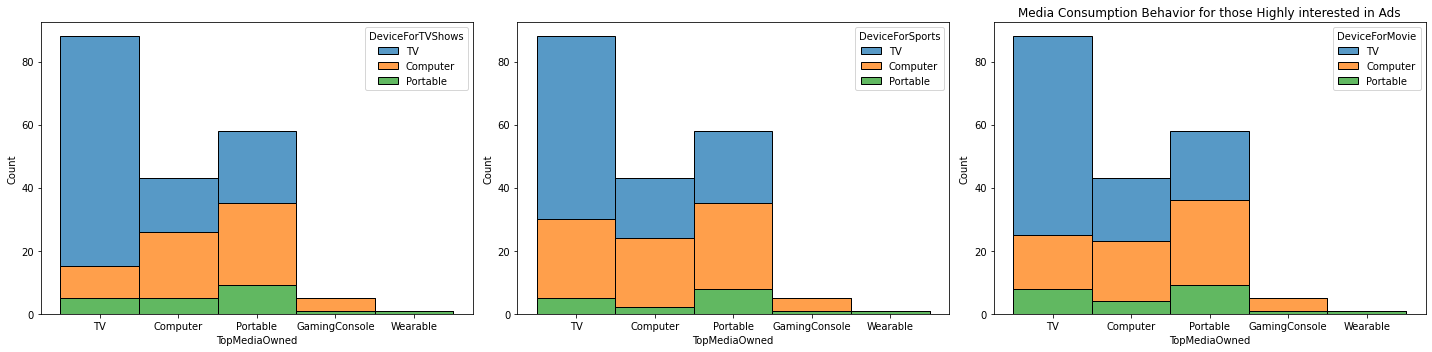

In [ ]:
f, axs = plt.subplots(1,3,figsize = (20,5))
sns.histplot(x="TopMediaOwned", hue="DeviceForTVShows", data=df[df['MarketingAffinity']=='HighInterest'], stat="count",multiple="stack",ax=axs[0])
sns.histplot(x="TopMediaOwned", hue="DeviceForSports", data=df[df['MarketingAffinity']=='HighInterest'], stat="count",multiple="stack",ax=axs[1])
sns.histplot(x="TopMediaOwned", hue="DeviceForMovie", data=df[df['MarketingAffinity']=='HighInterest'], stat="count",multiple="stack",ax=axs[2])
plt.title("Media Consumption Behavior for those Highly interested in Ads")
plt.tight_layout()
plt.show()

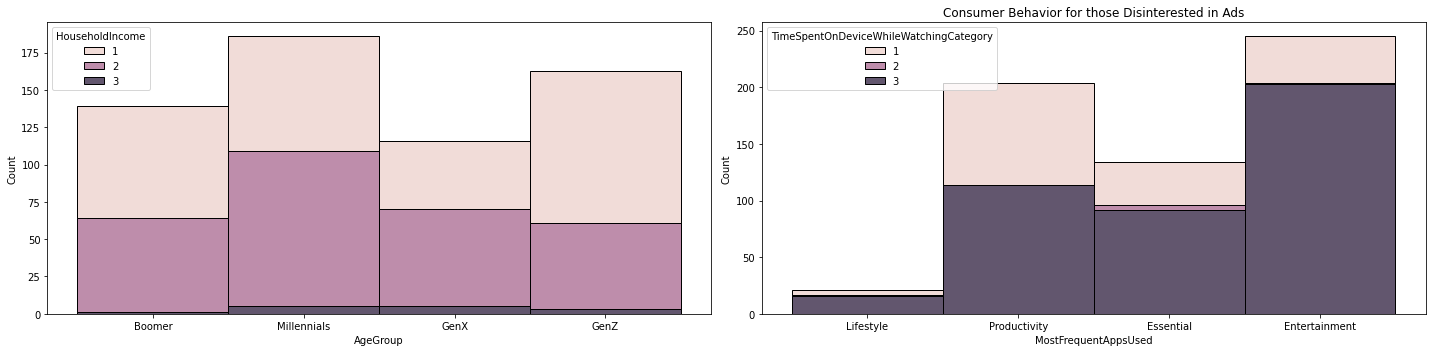

In [ ]:
#Analyzing features with high correlation for 'Disinterested' (would pay more to get no ads) consumers
f, axs = plt.subplots(1,2,figsize = (20,5))
sns.histplot(x="AgeGroup", hue="HouseholdIncome", data=df[df['MarketingAffinity']=='Disinterested'], stat="count",multiple="stack",ax=axs[0])
sns.histplot(x="MostFrequentAppsUsed", hue="TimeSpentOnDeviceWhileWatchingCategory", data=df[df['MarketingAffinity']=='Disinterested'], stat="count",multiple="stack",ax=axs[1])
plt.title("Consumer Behavior for those Disinterested in Ads")
plt.tight_layout()
plt.show()

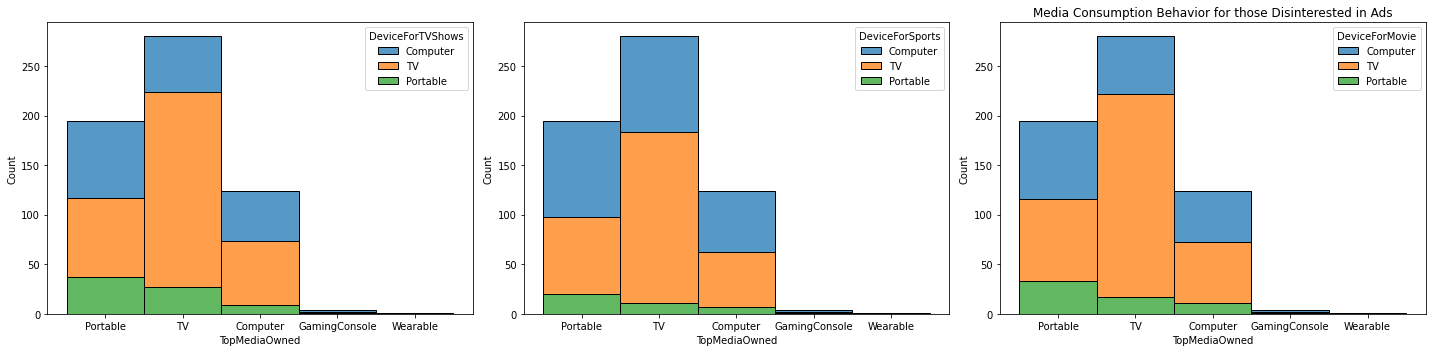

In [ ]:
f, axs = plt.subplots(1,3,figsize = (20,5))
sns.histplot(x="TopMediaOwned", hue="DeviceForTVShows", data=df[df['MarketingAffinity']=='Disinterested'], stat="count",multiple="stack",ax=axs[0])
sns.histplot(x="TopMediaOwned", hue="DeviceForSports", data=df[df['MarketingAffinity']=='Disinterested'], stat="count",multiple="stack",ax=axs[1])
sns.histplot(x="TopMediaOwned", hue="DeviceForMovie", data=df[df['MarketingAffinity']=='Disinterested'], stat="count",multiple="stack",ax=axs[2])
plt.title("Media Consumption Behavior for those Disinterested in Ads")
plt.tight_layout()
plt.show()

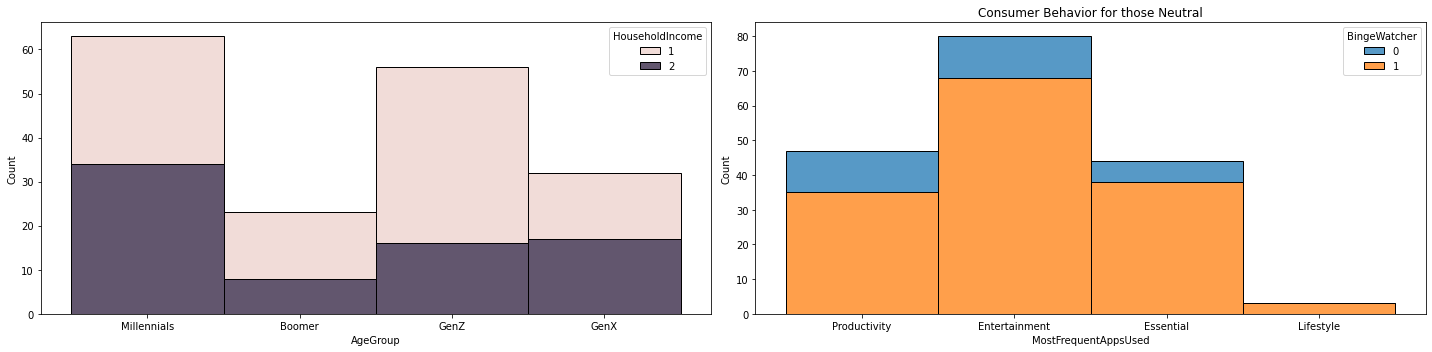

In [ ]:
#Analyzing features with high correlation for 'Neutral' (okay with Ads if it means reduction in Subscription Cost) consumers
f, axs = plt.subplots(1,2,figsize = (20,5))
sns.histplot(x="AgeGroup", hue="HouseholdIncome", data=df[df['MarketingAffinity']=='Neutral'], stat="count",multiple="stack",ax=axs[0])
sns.histplot(x="MostFrequentAppsUsed", hue="BingeWatcher", data=df[df['MarketingAffinity']=='Neutral'], stat="count",multiple="stack",ax=axs[1])

plt.title("Consumer Behavior for those Neutral")
plt.tight_layout()
plt.show()

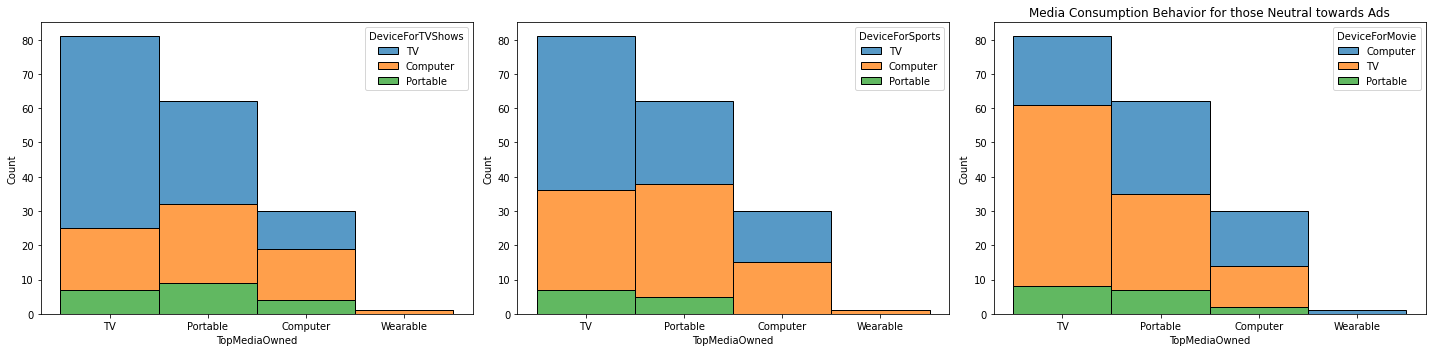

In [ ]:
f, axs = plt.subplots(1,3,figsize = (20,5))
sns.histplot(x="TopMediaOwned", hue="DeviceForTVShows", data=df[df['MarketingAffinity']=='Neutral'], stat="count",multiple="stack",ax=axs[0])
sns.histplot(x="TopMediaOwned", hue="DeviceForSports", data=df[df['MarketingAffinity']=='Neutral'], stat="count",multiple="stack",ax=axs[1])
sns.histplot(x="TopMediaOwned", hue="DeviceForMovie", data=df[df['MarketingAffinity']=='Neutral'], stat="count",multiple="stack",ax=axs[2])
plt.title("Media Consumption Behavior for those Neutral towards Ads")
plt.tight_layout()
plt.show()

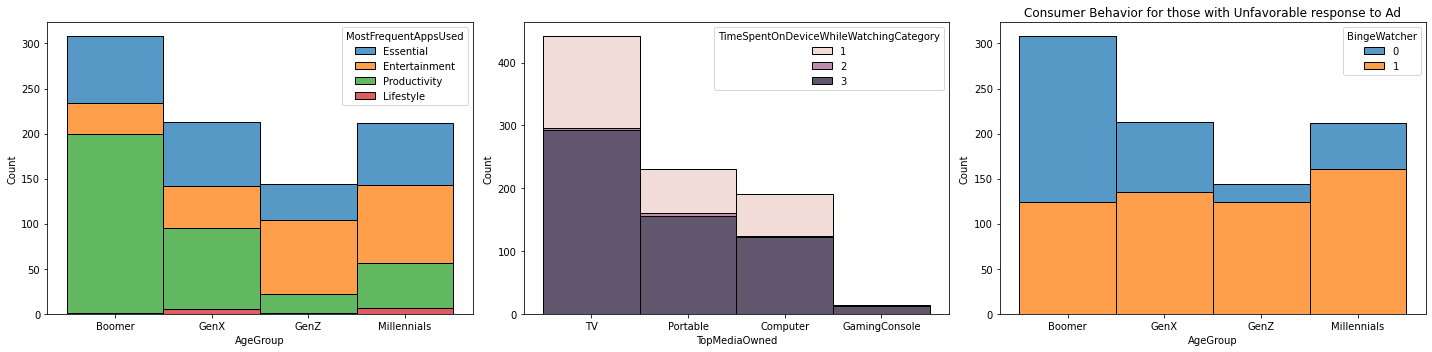

In [ ]:
#Analyzing features with high correlation for 'Unfavorable' (Do not want to share information for Ads at any cost) consumers
f, axs = plt.subplots(1,3,figsize = (20,5))

sns.histplot(x="AgeGroup", hue="MostFrequentAppsUsed", data=df[df['MarketingAffinity']=='Unfavorable'], stat="count",multiple="stack",ax=axs[0])
sns.histplot(x="TopMediaOwned", hue="TimeSpentOnDeviceWhileWatchingCategory", data=df[df['MarketingAffinity']=='Unfavorable'], stat="count",multiple="stack",ax=axs[1])
sns.histplot(x="AgeGroup", hue="BingeWatcher", data=df[df['MarketingAffinity']=='Unfavorable'], stat="count",multiple="stack",ax=axs[2])

plt.title("Consumer Behavior for those with Unfavorable response to Ad")
plt.tight_layout()
plt.show()

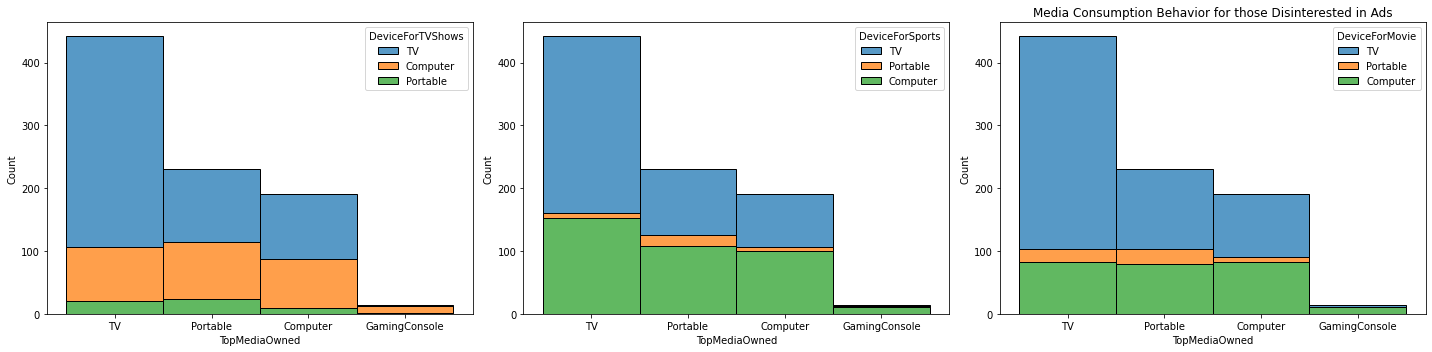

In [ ]:
f, axs = plt.subplots(1,3,figsize = (20,5))
sns.histplot(x="TopMediaOwned", hue="DeviceForTVShows", data=df[df['MarketingAffinity']=='Unfavorable'], stat="count",multiple="stack",ax=axs[0])
sns.histplot(x="TopMediaOwned", hue="DeviceForSports", data=df[df['MarketingAffinity']=='Unfavorable'], stat="count",multiple="stack",ax=axs[1])
sns.histplot(x="TopMediaOwned", hue="DeviceForMovie", data=df[df['MarketingAffinity']=='Unfavorable'], stat="count",multiple="stack",ax=axs[2])
plt.title("Media Consumption Behavior for those Disinterested in Ads")
plt.tight_layout()
plt.show()